In [1]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#import data
test_data = pd.read_csv("test.data.csv")
train_data = pd.read_csv("train.data.csv")
fancy_house = pd.read_csv("fancyhouse.csv")
train_data['bed_bath_interaction'] = train_data['bedrooms'] * train_data['bathrooms']
test_data['bed_bath_interaction'] = test_data['bedrooms'] * test_data['bathrooms']
fancy_house['bed_bath_interaction'] = fancy_house['bedrooms'] * fancy_house['bathrooms']

In [2]:
#a) R^2 on training data
features = ['bedrooms',"bathrooms","sqft_living","sqft_lot"]
features_w_interaction = ['bedrooms','bathrooms','sqft_living','sqft_lot','bed_bath_interaction']
y_train = train_data[["price"]]
y_test = test_data[["price"]]


In [51]:
#fit model
#standardize the fellas

X_train = StandardScaler().fit_transform(train_data[features])
X_test = StandardScaler().fit_transform(test_data[features])

linear_model = LinearRegression().fit(X = X_train, y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

print("Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


Training R^2:  0.5101138530794578
Test R^2:  0.5049329463821026


In [50]:
fancy_house[features]

,bedrooms,bathrooms,sqft_living,sqft_lot
0,8,25,50000,225000


In [55]:
#b)


#standardize fancy_house data
transformer = StandardScaler()
transformer.fit_transform(train_data[features]) #calculate the mean of the train data  and std
fancy_scaled = transformer.transform(fancy_house[features]) #use the standardization from the train_data on the fancy_house data

#predict price of the house
predicted_price = linear_model.predict(fancy_scaled)

print("Predicted Price of Bill Gate's House:   {}".format(predicted_price[0]))

#


Predicted Price of Bill Gate's House:   [15436769.53822249]


15 milly for Bill Gate's compound? Seems  a little low honestly

In [6]:
#c)
#update data with new variable

linear_model = LinearRegression().fit(X = train_data[features_w_interaction], y = y_train)

#generate predictions using train data to calculate training R^2
train_preds = linear_model.predict(train_data[features_w_interaction])
test_preds = linear_model.predict(test_data[features_w_interaction])

print("New Training R^2:  {}".format(r2_score(y_true = y_train,y_pred=train_preds)))
print("New Test R^2:  {}".format(r2_score(y_true = y_test, y_pred=test_preds)))


New Training R^2:  0.5173532927738305
New Test R^2:  0.5105355458590626


**Part d)**

In [7]:
import scipy
def rsquared(y_true, y_pred):
    #if its not an np.ndarray
    if(type(y_true) == pd.DataFrame):
        y_true = y_true.to_numpy()
    if(type(y_true) == list):
        y_true = np.asarray(y_true)
    
    if(type(y_pred) == pd.DataFrame):
        y_pred = y_pred.to_numpy()

    if(type(y_pred) == list):
        y_pred = np.asarray(y_pred)
    res = scipy.stats.linregress(y_true, y_pred)
    return res.rvalue**2

In [8]:
x = np.array(pd.DataFrame([1,2,4]))
y = np.array(pd.DataFrame([1.2,1.9,3.97]))


In [38]:
def gd(X,y,learning_parameter = .00001,tau = .001, max_iter = 20000):

    n = len(y)
    p = X.shape[1]
    #intial "guess" (first) iteration of betas
    beta = np.ones(p)

    #reshape so calculations can be performed
    beta = beta.reshape(p,1)
    y = np.array(y)
    
    #use this to store SSE
    MSE_list = list()
    
    #standardize  X (seems to help convergence)
    standardizer = StandardScaler()
    standardizer.fit_transform(X)
    X = standardizer.fit_transform(X)

    iter_counter = 0 #count number of iterations

    while True:
        
        #calculate the gradient
        gradient_vector = X.T @ (X @ beta - y)

        #calculate the norm of the vector. Used to determine whether loop should continue
        gradient_vector_norm = np.linalg.norm(gradient_vector)

        #update beta vector
        beta = beta - learning_parameter * gradient_vector 

        y_pred = X @ beta #calculate predicted values

        #calculate current iterations MSE and add to list
        MSE = mean_squared_error(y_true = y, y_pred = y_pred)
        MSE_list.append(MSE)

        iter_counter += 1 #update counter
        print('Iteration: {}, Norm of Gradient:  {}'.format(iter_counter,gradient_vector_norm))

        if(gradient_vector_norm < tau or iter_counter > max_iter): #if norm of gradient falls below threshold end loop
            break
    r_squared_calc = rsquared(y.flatten(),y_pred.flatten()) #calculate R-squared
    print("R-Squared:   {:.5f}".format(r_squared_calc))   
    return(beta,MSE_list, y, y_pred, standardizer)


In [ ]:

beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features],y = y_train, learning_parameter = .00004, tau = .01)

In [40]:
#training r2
training_r2 = rsquared(y_true = y.flatten(), y_pred = y_pred.flatten())

#generate predictions
X_test = StandardScaler().fit_transform(test_data[features])
test_predictions = X_test @ beta

test_r2 = rsquared(y_true = y_test.to_numpy().flatten(), y_pred= test_predictions.flatten())


In [41]:
# Repeat a)
print("Training R2 from Gradient Descent Regression Implementation:   {:.5f}".format(training_r2))
print("Testing R2 from Gradient Descent Regression Implementation:   {:.5f}".format(test_r2))


Training R2 from Gradient Descent Regression Implementation:   0.51011
Testing R2 from Gradient Descent Regression Implementation:   0.50526


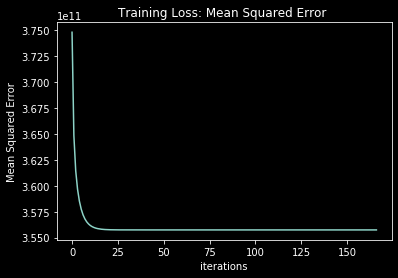

In [42]:
from matplotlib import style
style.use('dark_background')
plt.figure()
plt.plot(np.arange(0, len(returned_MSE_list)), returned_MSE_list) ## fix
plt.title("Training Loss: Mean Squared Error ")
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.show()

In [43]:
fancy_house[features]

,bedrooms,bathrooms,sqft_living,sqft_lot
0,8,25,50000,225000


In [48]:
#Repeat b)

beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features],y = y_train, learning_parameter = .00004, tau = .01)

#need to standardize fancy_house data using the mean and std from the training data
fancy_house_scaled = standardizer.transform(fancy_house[features])


fancy_house_scaled @ beta


Iteration: 1, Norm of Gradient:  5185991300.341278
Iteration: 2, Norm of Gradient:  2072809273.682034
Iteration: 3, Norm of Gradient:  1003031617.6659364
Iteration: 4, Norm of Gradient:  642460381.35682
Iteration: 5, Norm of Gradient:  491564663.9651663
Iteration: 6, Norm of Gradient:  401327662.5138394
Iteration: 7, Norm of Gradient:  335293725.70789415
Iteration: 8, Norm of Gradient:  283150637.32664466
Iteration: 9, Norm of Gradient:  240612306.80368227
Iteration: 10, Norm of Gradient:  205271567.18063077
Iteration: 11, Norm of Gradient:  175566360.17691374
Iteration: 12, Norm of Gradient:  150405267.71778882
Iteration: 13, Norm of Gradient:  128985141.0977269
Iteration: 14, Norm of Gradient:  110689659.73710419
Iteration: 15, Norm of Gradient:  95029787.73691219
Iteration: 16, Norm of Gradient:  81607563.5331986
Iteration: 17, Norm of Gradient:  70093224.45180923
Iteration: 18, Norm of Gradient:  60210092.023285896
Iteration: 19, Norm of Gradient:  51724080.726320885
Iteration: 20,

array([[14898622.65167107]])

In [56]:
# Repeat part c)
beta,returned_MSE_list, y, y_pred, standardizer = gd(train_data[features_w_interaction],y = y_train, learning_parameter = .00004, tau = .01)

Iteration: 1, Norm of Gradient:  5929348665.552127
Iteration: 2, Norm of Gradient:  5434064126.398718
Iteration: 3, Norm of Gradient:  5001165971.070366
Iteration: 4, Norm of Gradient:  4612841411.500545
Iteration: 5, Norm of Gradient:  4259989218.1344166
Iteration: 6, Norm of Gradient:  3937087069.9884963
Iteration: 7, Norm of Gradient:  3640378129.26082
Iteration: 8, Norm of Gradient:  3367070636.0019455
Iteration: 9, Norm of Gradient:  3114941531.5564575
Iteration: 10, Norm of Gradient:  2882128741.941849
Iteration: 11, Norm of Gradient:  2667017880.588795
Iteration: 12, Norm of Gradient:  2468177711.9820256
Iteration: 13, Norm of Gradient:  2284321347.1613126
Iteration: 14, Norm of Gradient:  2114281348.4646208
Iteration: 15, Norm of Gradient:  1956992597.2735624
Iteration: 16, Norm of Gradient:  1811479682.7627122
Iteration: 17, Norm of Gradient:  1676847067.1053188
Iteration: 18, Norm of Gradient:  1552271062.0828736
Iteration: 19, Norm of Gradient:  1436993063.3333688
Iteration:

In [57]:
#training r2
training_r2 = rsquared(y_true = y.flatten(), y_pred = y_pred.flatten())

#generate predictions
X_test = StandardScaler().fit_transform(test_data[features_w_interaction])
test_predictions = X_test @ beta

test_r2 = rsquared(y_true = y_test.to_numpy().flatten(), y_pred= test_predictions.flatten())

In [58]:
# Repeat a)
print("Training R2 from Gradient Descent Regression Implementation (additional features):   {:.5f}".format(training_r2))
print("Testing R2 from Gradient Descent Regression Implementation (additional features):   {:.5f}".format(test_r2))


Training R2 from Gradient Descent Regression Implementation (additional features):   0.51735
Testing R2 from Gradient Descent Regression Implementation (additional features):   0.51083


**Part e**